## 1. Business objectives based on the web scraping and sentiment analysis:

1. **Enhance Customer Satisfaction** by addressing negative feedback and improving overall experience.
2. **Improve Product or Service Quality** based on recurring positive and negative feedback trends.
3. **Strengthen Customer Trust** by resolving issues highlighted in negative sentiment and reinforcing transparency.
4. **Boost Customer Loyalty** by focusing on areas where customers express high satisfaction and offering rewards or retention strategies.
5. **Optimize Communication** by addressing concerns about responsiveness or transparency raised in reviews.
6. **Differentiate from Competitors** by capitalizing on strengths and unique features frequently mentioned in positive reviews.
7. **Drive Continuous Improvement** by using sentiment scores to guide product, service, and customer experience innovations.

In [9]:
# # Import the BeautifulSoup class for parsing HTML and XML
from bs4 import BeautifulSoup
import requests  # Import the requests library for making HTTP requests
link='https://www.trustpilot.com/review/keystonepuppies.com'
page=requests.get(link)# Send a GET request to the URL and store the response in the variable 'page'
page




<Response [200]>

response: 200 means access is successful we can extract the information from website 

##### page.content: is an attribute that contains the raw bytes of the HTTP response body, representing the HTML content of the fetched webpage.

In [11]:
page.content

b'<!DOCTYPE html><html lang="en-US"><head><meta charSet="UTF-8"/><meta name="viewport" content="width=device-width, initial-scale=1"/><link rel="shortcut icon" type="image/x-icon" href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/favicon.ico"/><link rel="manifest" href="/manifest.json"/><meta name="application-name" content="Trustpilot"/><meta name="theme-color" content="#1c1c1c"/><link rel="apple-touch-icon" sizes="180x180" href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/apple-touch-icon.png"/><link rel="icon" type="image/png" sizes="32x32" href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/favicon-32x32.png"/><link rel="icon" type="image/png" sizes="16x16" href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/favicon-16x16.png"/><link rel="mask-icon" href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/safari-pinned-tab.svg" color="#00b67a"/><meta name="apple-mobile-web-app-title" content="Trustpilot"/><meta name="msapplication-TileCol

##### soup = BeautifulSoup(page.content, 'html.parser') :makes a BeautifulSoup object that helps to read and navigate the HTML of the webpage we got.

In [13]:
soup=BeautifulSoup(page.content,'html.parser')

In [15]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/manifest.json" rel="manifest"/>
  <meta content="Trustpilot" name="application-name"/>
  <meta content="#1c1c1c" name="theme-color"/>
  <link href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link color="#00b67a" href="https://cdn.trustpilot.net/brand-assets/4.3.0/favicons/safari-pinned-tab.svg" rel="mask-icon"/>
  <meta content="Trustpilot" name="apple-mobile-web-app-title"/

The below code extracts review titles from the webpage by finding all h2 elements with a specific class, stores the text of these titles in a list, removes any newline characters from each title, and counts the total number of titles extracted.

In [17]:
title=soup.find_all('h2',class_="typography_heading-s__f7029 typography_appearance-default__AAY17")
title
review_title=[]
for i in range(0,len(title)):
    review_title.append(title[i].get_text())
review_title
review_title[:]=[title.strip('\n') for title in review_title]
review_title
len(review_title)

20

The below code extracts ratings from the webpage by finding all `<div>` elements with a specific class, stores the text of each rating in the `review_ratings` list, removes any leading or trailing slashes, and then prints the total number of ratings extracted along with the list of ratings.

In [42]:
# Extract ratings
ratings = soup.find_all('div', class_="styles_reviewHeader__iU9Px")

# List to store ratings
review_ratings = []

# Loop through and extract text for ratings
for rating in ratings:
    review_ratings.append(rating.get_text().strip('/'))

# Print or check the length of the extracted ratings
print(len(review_ratings))  # Should match the number of ratings extracted
print(review_ratings)

20
['Sep 13, 2024Verified', 'Sep 13, 2024Verified', 'Sep 14, 2024Verified', 'Sep 2, 2024', 'Aug 30, 2024', 'Aug 7, 2024Verified', 'Updated Aug 3, 2024Verified', 'Aug 6, 2024Verified', 'Jun 23, 2024Redirected', 'Jul 23, 2024Verified', 'Aug 20, 2024Verified', 'Jul 23, 2024Verified', 'Jun 4, 2024Verified', 'Jun 18, 2024Verified', 'Jun 7, 2024Verified', 'Feb 18, 2024Verified', 'Feb 29, 2024Verified', 'Feb 21, 2024', 'Feb 14, 2024Verified', 'Jan 6, 2024']


##### Output Explanation :<u> Extracted 20 ratings from the webpage</u>. This number indicates that there are 20 <div> elements with the specified class that contain rating information. Each of these ratings was processed and added to the review_ratings list, confirming that the extraction was performed correctly.

In [46]:
#lets scrap the review body
review = soup.find_all('p',class_="typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn")

review_body = []
for i in range(0, len(review)):
    review_body.append(review[i].get_text())

review_body
len(review_body)

20

##### <u>Extracted 20 opinions from customers about the product</u>

#### Now storing title, ratings and body in csv file using dataframe and pandas library

In [48]:
import pandas as pd
df=pd.DataFrame()
df['review_title']=review_title
df['review_ratings']=review_ratings
df['review']=review_body
df

df.to_csv('D:/DS/TextMining/Web_scrapping_Project/trustpilot_reviews.csv')


## 2.Performing sentimental Analysis

##### sentiment analysis in 4 simple points:

<h5><u>Understanding Feelings</u></h5> : It checks what people feel in their written words.

<h5><u>Types of Text</u></h5>: Looks at reviews, comments, or social media posts.

<h5><u>Sentiment Types</u></h5>: Tells if the feelings are positive, negative, or neutral.

<h5><u>Uses</u></h5>: Helps businesses know customer opinions and trends.

Performing sentiment analysis involves determining the emotional tone or polarity (positive, negative, or neutral) of a given text. In your case, you have customer reviews stored in a CSV file, and you want to analyze the sentiment of these reviews to understand how customers feel about the product or service.

#### Step 1: Load the CSV file 

In [59]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('D:/DS/TextMining/Web_scrapping_Project/trustpilot_reviews.csv')

# Display the first few rows of the DataFrame
print(df.head())

   Unnamed: 0                   review_title        review_ratings  \
0           0  Good border collie experience  Sep 13, 2024Verified   
1           1                Trust this site  Sep 13, 2024Verified   
2           2                     Puppy Love  Sep 14, 2024Verified   
3           3            Such a happy fella!           Sep 2, 2024   
4           4        Everything we expected!          Aug 30, 2024   

                                              review  
0  David Beiler and his family were very nice to ...  
1  My puppy is healthy and a pleasure. The breede...  
2  Communication made the experience of getting a...  
3  We found the most adorable French Bulldog on t...  
4  I adopted a puppy from Jacob Speicher on Keyst...  


##### we'll use the VADER sentiment analyzer from the nltk library.

#pip install nltk

In [63]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (if not already installed)
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Step 3: Perform Sentiment Analysis
In this step, you apply the sentiment analysis tool to each review in the review_body column. The VADER tool will give a compound score that indicates the overall sentiment.

In [130]:
#this code calculates and displays the sentiment scores for each review,
#allowing you to see how positive, negative, or neutral each review is.

In [68]:
# Apply sentiment analysis to each review
df['sentiment_scores'] = df['review'].apply(lambda review: sid.polarity_scores(review)['compound'])

# Show the DataFrame with the sentiment scores
print(df[['review', 'sentiment_scores']])


                                               review  sentiment_scores
0   David Beiler and his family were very nice to ...            0.9492
1   My puppy is healthy and a pleasure. The breede...            0.9709
2   Communication made the experience of getting a...            0.9118
3   We found the most adorable French Bulldog on t...            0.9668
4   I adopted a puppy from Jacob Speicher on Keyst...            0.9739
5   Great people  they were very welcoming and ans...            0.9200
6   If it wasn’t for Keystone Puppies, we wouldn’t...            0.9701
7   Friendly, easy to work with and schedule puppy...            0.9450
8   I got a wonderful little Cavapoo puppy from br...            0.9285
9   I LOVE MY KEYSTONE PUP❣️ I was nervous to driv...            0.9917
10  I do love my puppy!!I have not had alot of exp...            0.2363
11  Very easy to look at the available puppies for...            0.9544
12  We had been researching and searching for the ...           

###### On which basis we are deciding the review is +,- or neutral:
Word Sentiment: The analyzer uses a <u>pre-defined list of words</u> associated with positive and negative sentiments.
For example, words like <u>"great"</u> or <u>"excellent"</u> are considered positive, while words like <u>"bad"</u> or <u>"terrible"</u> are <u>negative.</u>



### Step 4: Assign Sentiment Labels
Classify the reviews as positive, negative, or neutral based on their sentiment scores.

In [ ]:
# Classify sentiment based on compound score
df['sentiment_label'] = df['sentiment_scores'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Show the DataFrame with sentiment labels
print(df[['review', 'sentiment_scores', 'sentiment_label']])


##### creates a new column called sentiment_label in the DataFrame.

##### The apply method uses a lambda function to classify each sentiment score based on its value:
1) If the score is greater than 0, it assigns the label 'positive'.

2) If the score is less than 0, it assigns the label 'negative'.

3) If the score is exactly 0, it assigns the label 'neutral'.

### Step 5: Save the Results
Finally, save the DataFrame with sentiment information into a new CSV file.

In [74]:
# Save the DataFrame to a new CSV file with sentiment analysis
df.to_csv('D:/DS/TextMining/Web_scrapping_Project/trustpilot_reviews_with_sentiment.csv', index=False)


## Step-by-Step Code to Build Unigram and Bigram Word Clouds

#### Step 1: Install Required Libraries

In [ ]:
#pip install wordcloud matplotlib


#### Step 2: Import Required Libraries

##### A word cloud visually represents text data by showing words in different sizes based on how frequently they appear. It highlights the most common words, making it easy to see the main topics or themes in the text at a glance.

In [80]:
from wordcloud import WordCloud
# Importing pyplot from matplotlib for plotting graphs and visualizations
import matplotlib.pyplot as plt
#which helps count the occurrences of items in a collection, making it easier to analyze word frequencies.
from collections import Counter
#Text to Numeric Conversion
from sklearn.feature_extraction.text import CountVectorizer


#### Step 3: Preprocess the Review Text for Word Clouds
You need to preprocess the review text by tokenizing and cleaning it (removing stopwords, punctuation, etc.).

##### Sub-step 1: Import Required Libraries
python

In [83]:
import re
import nltk # (NLTK) includes a list of about 200 stopwords.

# Download stopwords from NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


A **corpus** is a large collection of texts used for studying language. It includes written or spoken materials like books and conversations. Researchers use it to find language patterns or train computer programs. For example, in NLTK, the `stopwords` corpus is a list of common words that are often ignored in text analysis. In short, a corpus helps us understand and analyze language better.

##### Sub-step 2: Define a Function to Clean the Review Text
We’ll remove non-alphabet characters and convert text to lowercase.

In [87]:
# Function to clean the review text
def clean_text(text):
    # Remove non-alphabetic characters and make everything lowercase
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    return cleaned_text

# Test this function with an example
example_review = "This product is AMAZING!!! But a bit expensive, 4/5 stars :)"
print(clean_text(example_review))


this product is amazing but a bit expensive  stars 


##### Sub-step 3: Remove Stopwords from the Review Text
Stopwords like “and,” “the,” “is” add little value for sentiment analysis, so let’s remove them.

In [90]:
# Function to remove stopwords
def remove_stopwords(text):
    # Split the text into words, remove stopwords, and join them back
    filtered_words = [word for word in text.split() if word not in stop_words]
    return ' '.join(filtered_words)

# Test this function with an example
cleaned_text = clean_text(example_review)
print(remove_stopwords(cleaned_text))


product amazing bit expensive stars


##### Sub-step 4: Apply the Preprocessing Functions to Your Data
Now, apply both the cleaning and stopword removal to the review column in your dataset.

In [93]:
# Apply the cleaning and stopword removal to the 'review' column
df['cleaned_review'] = df['review'].apply(lambda x: remove_stopwords(clean_text(x)))

# Display the cleaned reviews
print(df[['review', 'cleaned_review']].head())


                                              review  \
0  David Beiler and his family were very nice to ...   
1  My puppy is healthy and a pleasure. The breede...   
2  Communication made the experience of getting a...   
3  We found the most adorable French Bulldog on t...   
4  I adopted a puppy from Jacob Speicher on Keyst...   

                                      cleaned_review  
0  david beiler family nice deal liked children p...  
1  puppy healthy pleasure breeders place clean an...  
2  communication made experience getting puppy he...  
3  found adorable french bulldog keystone site co...  
4  adopted puppy jacob speicher keystone puppies ...  


#### Step 4: Create a Unigram Word Cloud
A unigram word cloud shows individual words. Here’s how you can generate it:

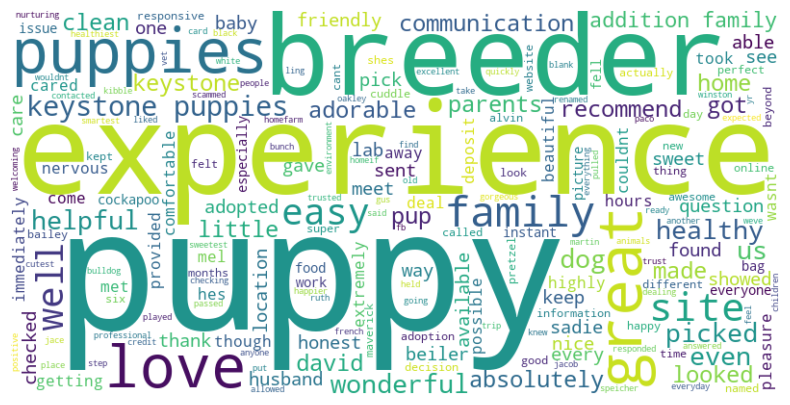

In [96]:
# Join all the reviews into a single string
unigram_text = ' '.join(df['cleaned_review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(unigram_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### Step 5: Create a Bigram Word Cloud
A bigram word cloud shows pairs of words that commonly occur together. Use CountVectorizer to extract bigrams.

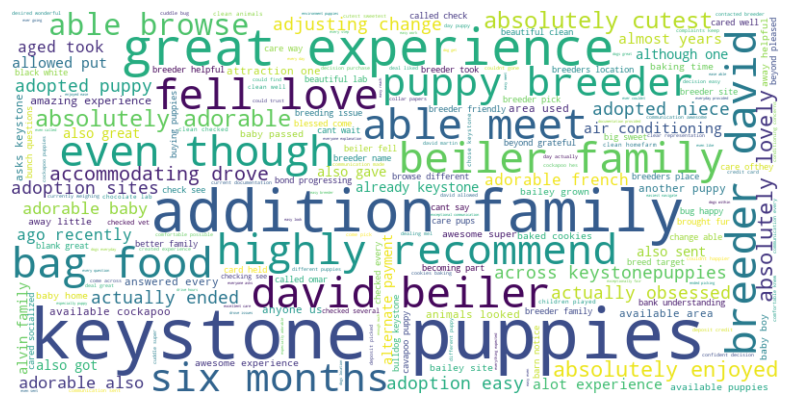

In [99]:
# Use CountVectorizer to find bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = vectorizer.fit_transform(df['cleaned_review'])

# Sum the occurrences of each bigram
bigram_counts = bigrams.sum(axis=0).tolist()[0]
bigram_words = vectorizer.get_feature_names_out()

# Create a dictionary of bigram words and their counts
bigram_dict = dict(zip(bigram_words, bigram_counts))

# Generate the bigram word cloud
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_dict)

# Plot the bigram word cloud
plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


##### A **unigram** is a single word or token, analyzing individual words in text, while a **bigram** is a pair of consecutive words, capturing relationships between neighboring words. Bigrams provide more context but are more complex than unigrams.

### Write about the benefits/impact of the solution - in what way does the business (client) benefit from the solution provided?

The solution provides businesses with automated, real-time data collection, saving time and costs. It helps extract valuable insights for better market strategies, customer sentiment analysis, and informed decision-making, ultimately improving business efficiency and competitiveness.